# Multiple Linear Regression

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Import data file

dataset=pd.read_csv('insurance.csv')

dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Encoding categorical data

In [3]:
objList = dataset.select_dtypes(include = "object").columns
print (objList)

Index(['sex', 'smoker', 'region'], dtype='object')


In [4]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    dataset[feat] = le.fit_transform(dataset[feat].astype(str))

print (dataset.info())

dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB
None


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Create X and y arrays

In [5]:
# Create X set and y set. They are arrays and vectors
#X=dataset.iloc[:,0].values
X=dataset.iloc[:,:-1].values
print(X)
y=dataset.iloc[:,-1].values

print(y)

[[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   36.85  0.    0.    2.  ]
 [21.    0.   25.8   0.    0.    3.  ]
 [61.    0.   29.07  0.    1.    1.  ]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


## Creating Training and Test Data Sets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=44)

## Training Multiple Linear Regression on Training set

In [7]:
from sklearn.linear_model import LinearRegression #Calling LinearRegression Class
regressor=LinearRegression() #Creating an object of LinearRegression
regressor.fit(X_train, y_train) #Method of the linear regression class

#Note: LinearRegression Class takes care of Dummy Variable trap

LinearRegression()

Note: Backward elimination is irrelevant because the Scikit-Learn library automatically takes care of selecting the statistically significant features when training the model to make accurate predictions.

## Predicting Test set results

In [8]:
y_pred=regressor.predict(X_test) # Predicting values on test data
#print(y_pred)

In [9]:
np.set_printoptions(precision=2) #  To display with two decimal points all printed values

In [10]:
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)),axis=1)) 
#Concatenate both y_pred amd y_test as column vectors

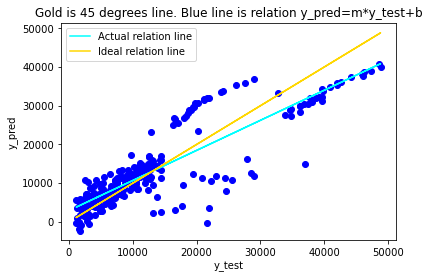

Slope: m= 0.78
Intercept: b= 2924.65


In [17]:
plt.scatter(y_test, y_pred,  color='blue')
m, b = np.polyfit(y_test, y_pred, 1) # 1 is the degree of the polynomial to fit.
plt.plot(y_test, m*y_test+b, color='cyan', label="Actual relation line")
plt.plot(y_test, y_test, color='gold', label="Ideal relation line")
plt.title("Gold is 45 degrees line. Blue line is relation y_pred=m*y_test+b")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.legend()
plt.show()
print("Slope: m=","{:.2f}".format(m))
print("Intercept: b=","{:.2f}".format(b))

### Calculating Regression model's precision (Aspect Ratio: AR)

In [12]:
#Estimating correlation coefficient and R^2

correlation_matrix = np.corrcoef(y_test, y_pred)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)

0.7548165912304468


In [13]:
# Aspect ratio calculation (precision)
AR=(1-correlation_xy)**(0.5-1)
print(AR)

2.7608072329821174


A good correlation coefficient is >=0.98, yielding an aspect ratio of 7 to 1 (minimum suggested)

## Obtaining model coefficients

In [14]:
# Obtaining the model equation
print(regressor.coef_)
print(regressor.intercept_)

[  254.21  -233.99   345.45   502.46 23966.6   -344.46]
-12095.637432727546


In [21]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred, multioutput='uniform_average')

0.754171733413801

Note: Explained variance regression score function. Best possible score is 1.0, lower values are worse.
Expecter_Var_Score=1-(var(y_test-y_pred)/var(y_test))